<a href="https://colab.research.google.com/github/anasjawed283/MachineLearningBasics/blob/main/ML_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **Name** - Anas Jawed
*   **Registration number** - 21BRS1336
*   **ML Lab 2**
*   **Prof Rajarajeshwari**


---


LAB 2(26/07/24) – Linear Regression



---


*   X1, X2, X3….. Independent variables
*   Y= Dependent variable.
Compare all  plots P1( X1,Y), P2(X2,Y), P3(X3,Y), ……



---


1.	Open data set
2.	Check for linearity
3.	Data preprocessing
4.	Model fitting
5.	Test
6.	Check for assumptions
a.	 Mean of Residuals
b.	 Check for Homoscedasticity
c.	 Check for Normality of error terms/residuals
d.	 No autocorrelation of residuals
e.	 No perfect multicollinearity
7.	Evaluation – MSE, MAE, R2
8.	Compare the all plots and find the best independent variable  .





In [32]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#--------------------------- 1. Open datase--------------------------#

df = pd.read_csv('/content/mydataset/Regression1.csv')
print(df.head())

      X1     X2     X3      X4      X5      X6     X7   Y
0  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7


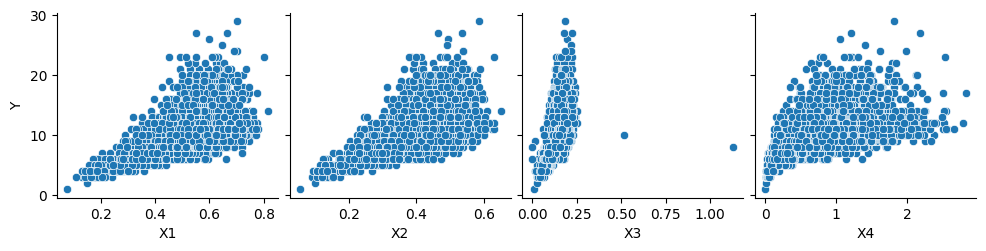

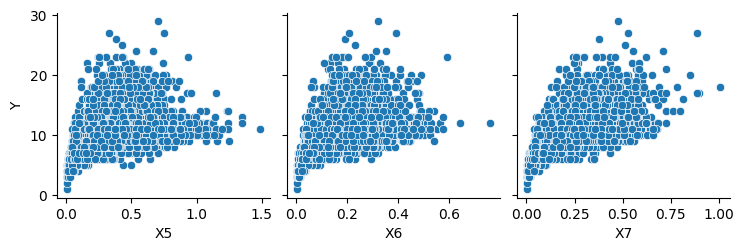

In [33]:
#----------------------- 2. Check for linearity----------------------#
## Create scatter plots for each independent variable against the dependent variable

import matplotlib.pyplot as plt
# Create pairplot to check linearity
sns.pairplot(df, x_vars=['X1','X2','X3','X4'], y_vars='Y', kind='scatter')
print('\n')
sns.pairplot(df, x_vars=['X5','X6','X7'], y_vars='Y', kind='scatter')
plt.show()


In [34]:
#3.	Data preprocessing
df.isnull().sum()
df.dropna()

,X1,X2,X3,X4,X5,X6,X7,Y
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [35]:
#4.	Model fitting
x = df.drop(["Y"],axis=1)
y = df.Y
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [24]:
#5.	Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.5260176935365597


In [25]:
# --------------------- 6. Check for Assumptions -------------------------#
# Predict on the test data
y_pred_test = regr.predict(X_test)
residuals = y_test - y_pred_test # Use y_pred_test instead of y_pred
# a. Mean of Residuals
print('Mean of Residuals:', np.mean(residuals))

Mean of Residuals: -0.0041682660315595765


Mean of Residuals: -0.0041682660315595765


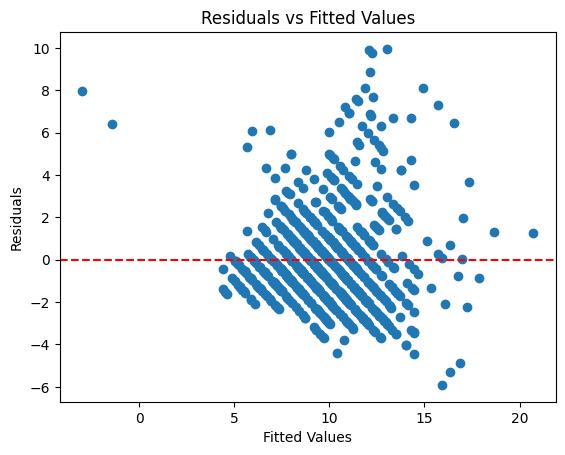

In [26]:
# --------------------- 6. Check for Assumptions -------------------------#
# Predict on the test data
y_pred_test = regr.predict(X_test)
residuals = y_test - y_pred_test # Use y_pred_test instead of y_pred
# a. Mean of Residuals
print('Mean of Residuals:', np.mean(residuals))

# b. Check for Homoscedasticity
plt.figure()
# Use y_pred_test for consistency with residuals
plt.scatter(y_pred_test, residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

<ipython-input-27-ed1717b8e4dc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


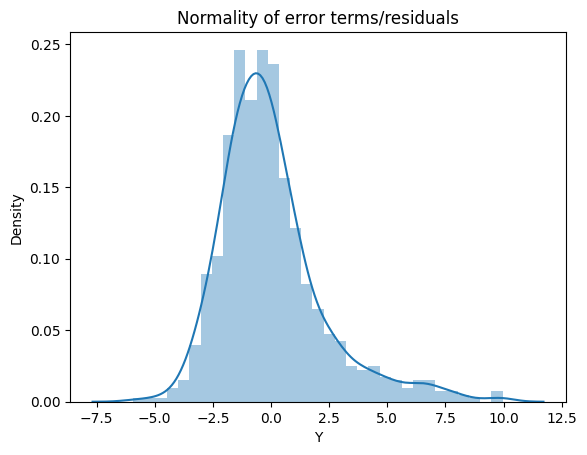

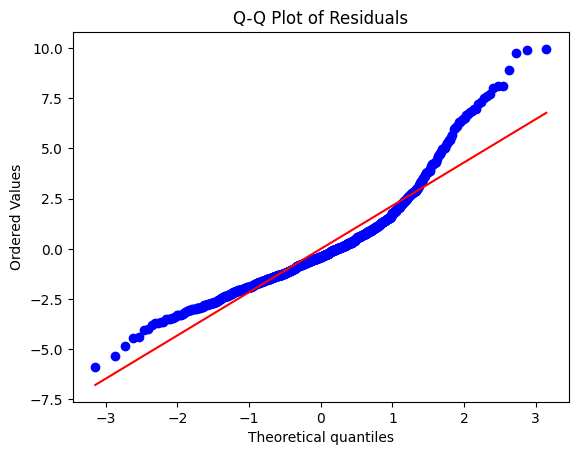

In [27]:
# c. Check for Normality of error terms/residuals
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

plt.figure()
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [28]:
# d. No autocorrelation of residuals
print('Durbin-Watson statistic:', durbin_watson(residuals))

Durbin-Watson statistic: 2.018458392863223


Correlation Matrix:
           0         1         2         3         4         5         6
0  1.000000  0.986812  0.827554  0.925261  0.897914  0.903018  0.897706
1  0.986812  1.000000  0.833684  0.925452  0.893162  0.899724  0.905330
2  0.827554  0.833684  1.000000  0.819221  0.774972  0.798319  0.817338
3  0.925261  0.925452  0.819221  1.000000  0.969405  0.966375  0.955355
4  0.897914  0.893162  0.774972  0.969405  1.000000  0.931961  0.882617
5  0.903018  0.899724  0.798319  0.966375  0.931961  1.000000  0.907656
6  0.897706  0.905330  0.817338  0.955355  0.882617  0.907656  1.000000




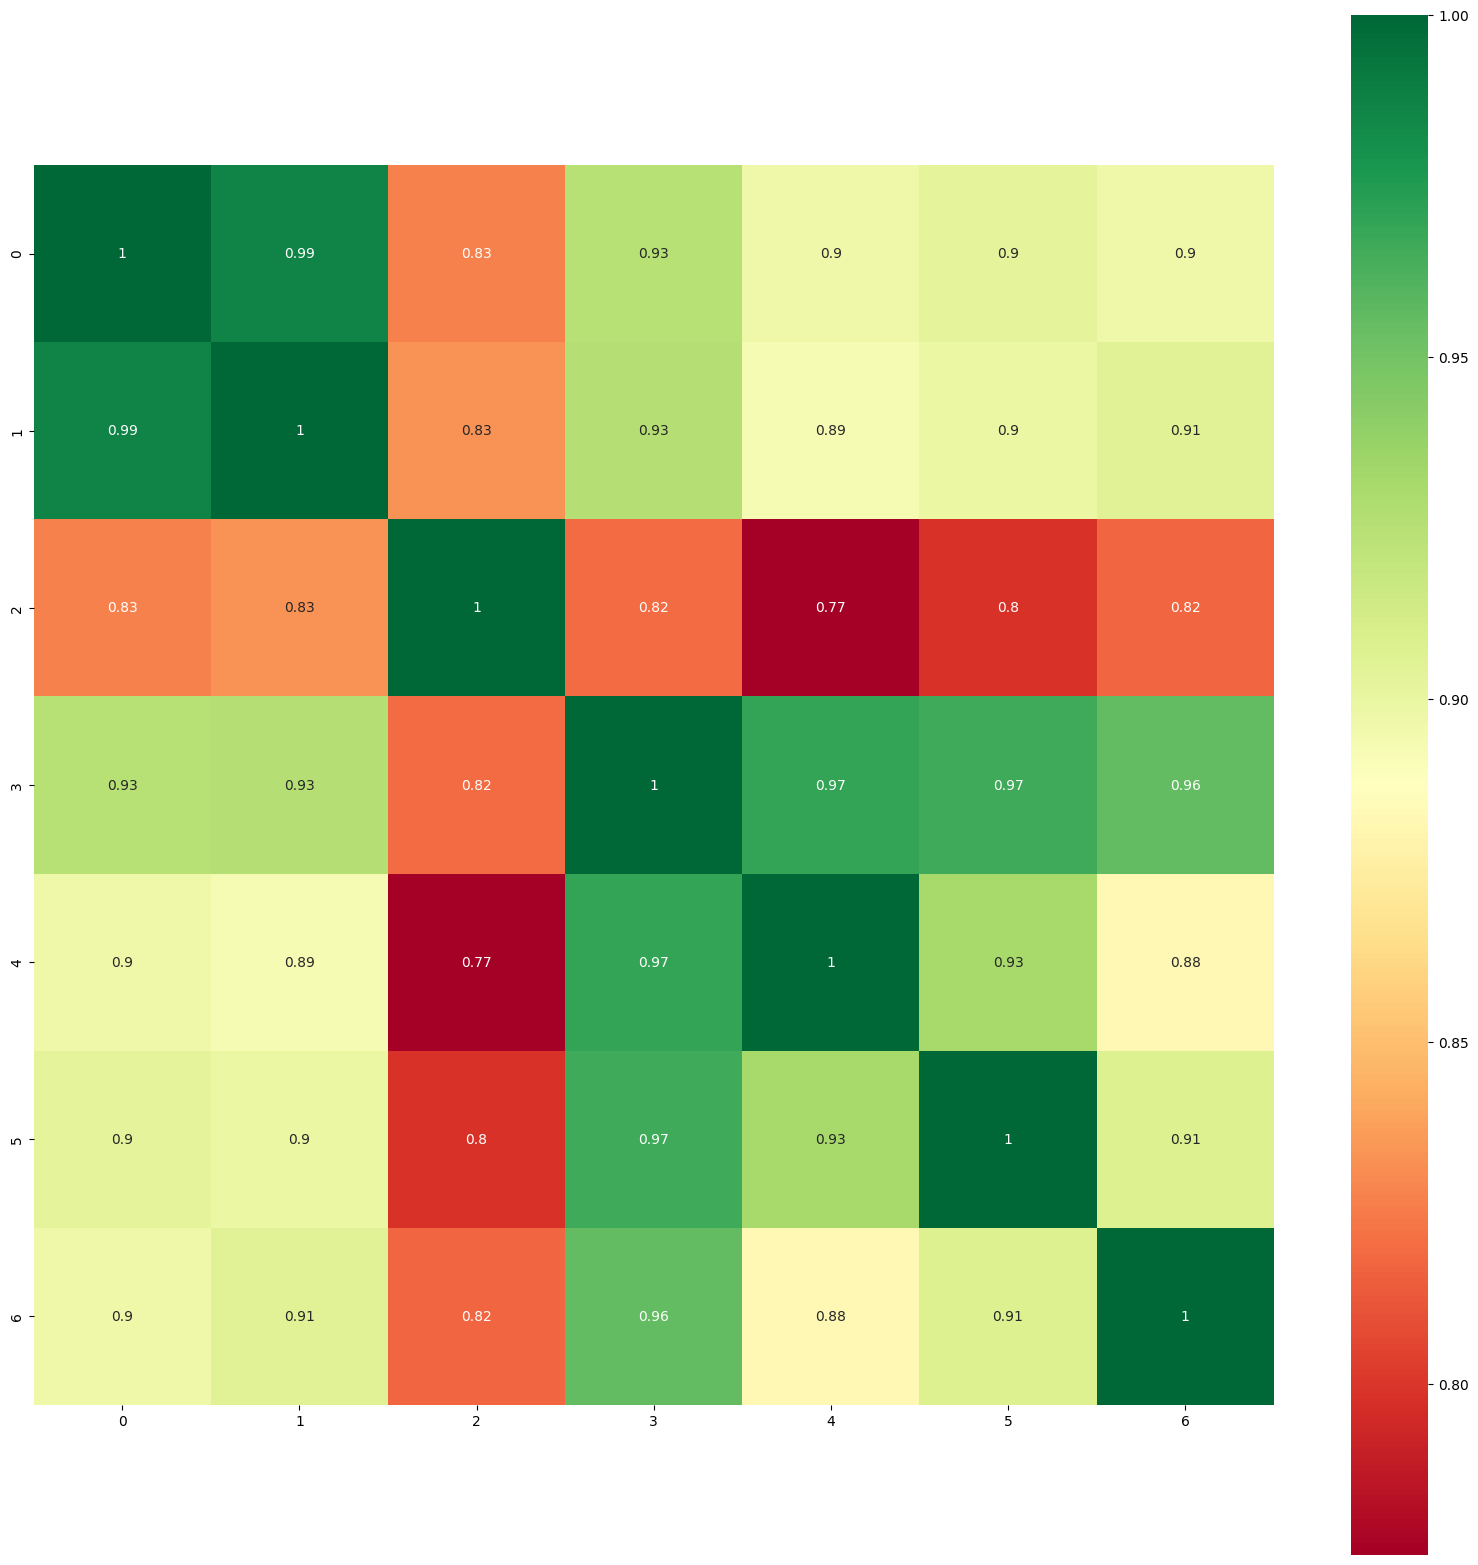

In [29]:
import pandas as pd  # Import pandas

# e. No perfect multicollinearity (Check correlation matrix)
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
correlation_matrix = X.corr()
print('Correlation Matrix:\n', correlation_matrix)
print('\n')
plt.figure(figsize=(20, 20))
p = sns.heatmap(X.corr(), annot=True, cmap='RdYlGn', square=True)
plt.show()

In [30]:
# 7. Evaluation - MSE, MAE, R2
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_test)) # Use y_pred_test
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_test)) # Use y_pred_test
print('R-squared:', r2_score(y_test, y_pred_test)) # Use y_pred_test

Mean Squared Error: 5.055541144299383
Mean Absolute Error: 1.629248267393658
R-squared: 0.5329844757724522


In [31]:
# 8. Compare plots and find the best independent variable
r2_values = {}
for col in df.columns[:-1]:
    X_temp = df[[col]]
    X_train_temp, X_test_temp, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=42)
    model_temp = LinearRegression()
    model_temp.fit(X_train_temp, y_train)
    y_pred_temp = model_temp.predict(X_test_temp)
    r2_values[col] = r2_score(y_test, y_pred_temp)

print('R-squared values for individual variables:\n', r2_values)

R-squared values for individual variables:
 {'X1': 0.3332055198307511, 'X2': 0.35491387033626953, 'X3': 0.3531105330533034, 'X4': 0.30873733124153424, 'X5': 0.185048105547429, 'X6': 0.26586630629537333, 'X7': 0.40085309555508564}
